# Skript for Creating Animated Graphics About Opioids in the USA

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
#matplotlib.use("Agg")
#matplotlib.use('qt5agg')
from matplotlib.animation import FuncAnimation
import scipy.io as spio
import folium

## Overdose Graphic For Heroin And Perscribed Opioid Pain Relievers
* The number of heroin overdoses has increased by 533% since 2002
* If the death toll continues to rise on its current path, nearly 94,000 (written in https://www.statnews.com/2017/06/27/opioid-deaths-forecast/) Americans will die yearly from opioids by 2027
* If the trend continues on its current trajectory the epidemic will kill more Americans than U.S. servicemen killed during World War Two
* 2016, more Americans died from drug overdoses than U.S. soldiers killed in the entire Vietnam war

* Opioids are killing more Americans than breast cancer and Opioid related overdoses kill more Americans than AIDS and HIV at the peak of their epidemics

#### Read in Data

In [3]:
overdoseAll = pd.read_excel('overdose_data_1999-2015.xls',sheetname='Online',skiprows =6)
#source: https://www.drugabuse.gov/related-topics/trends-statistics/overdose-death-rates

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [4]:
overdoseAll

,Unnamed: 0,Unnamed: 1,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,Total Overdose Deaths,16849.0,17415.0,19394.0,23518.0,25785.0,27424.0,29813.0,34425.0,36010.0,36450.0,37004.0,38329.0,41340.0,41502.0,43982.0,47055.0,52404.0
1,NaN,Female,5591.0,5852.0,6736.0,8490.0,9386.0,10304.0,11089.0,12532.0,13712.0,13982.0,14411.0,15323.0,16352.0,16390.0,17183.0,18243.0,19447.0
2,NaN,Male,11258.0,11563.0,12658.0,15028.0,16399.0,17120.0,18724.0,21893.0,22298.0,22468.0,22593.0,23006.0,24988.0,25112.0,26799.0,28812.0,32957.0
3,NaN,Prescription Drugs1,7523.0,7885.0,9197.0,11529.0,12640.0,14153.0,15352.0,18559.0,19601.0,20044.0,20848.0,22134.0,22810.0,22114.0,22767.0,25760.0,29728.0
4,NaN,Female,3011.0,3196.0,3790.0,4765.0,5191.0,5980.0,6351.0,7553.0,8251.0,8275.0,8740.0,9292.0,9771.0,9632.0,10019.0,11181.0,12218.0
5,NaN,Male,4512.0,4689.0,5407.0,6764.0,7449.0,8173.0,9001.0,11006.0,11350.0,11769.0,12108.0,12842.0,13039.0,12482.0,12748.0,14579.0,17510.0
6,NaN,Opioid Pain Relievers2,4030.0,4400.0,5528.0,7456.0,8517.0,9857.0,10928.0,13723.0,14408.0,14800.0,15597.0,16651.0,16917.0,16007.0,16235.0,18893.0,22598.0
7,NaN,Female,1287.0,1534.0,1969.0,2761.0,3173.0,3758.0,4188.0,5058.0,5630.0,5733.0,6213.0,6631.0,6903.0,6745.0,6992.0,7924.0,8786.0
8,NaN,Male,2743.0,2866.0,3559.0,4695.0,5344.0,6099.0,6740.0,8665.0,8778.0,9067.0,9384.0,10020.0,10014.0,9262.0,9243.0,10969.0,13812.0
9,NaN,Benzodiazepines3,1135.0,1298.0,1594.0,2022.0,2248.0,2627.0,3084.0,3835.0,4500.0,5010.0,5567.0,6497.0,6872.0,6524.0,6973.0,7945.0,8791.0


#### Helper Functions

In [5]:
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data
def augment(xold,yold,numsteps):
    xnew = []
    ynew = []
    for i in range(len(xold)-1):
        difX = xold[i+1]-xold[i]
        stepsX = difX/numsteps
        difY = yold[i+1]-yold[i]
        stepsY = difY/numsteps
        for s in range(numsteps):
            xnew = np.append(xnew,xold[i]+s*stepsX)
            ynew = np.append(ynew,yold[i]+s*stepsY)
    return xnew,ynew

### Plot the Number of Opioid Overdoses

<IPython.core.display.Javascript object>


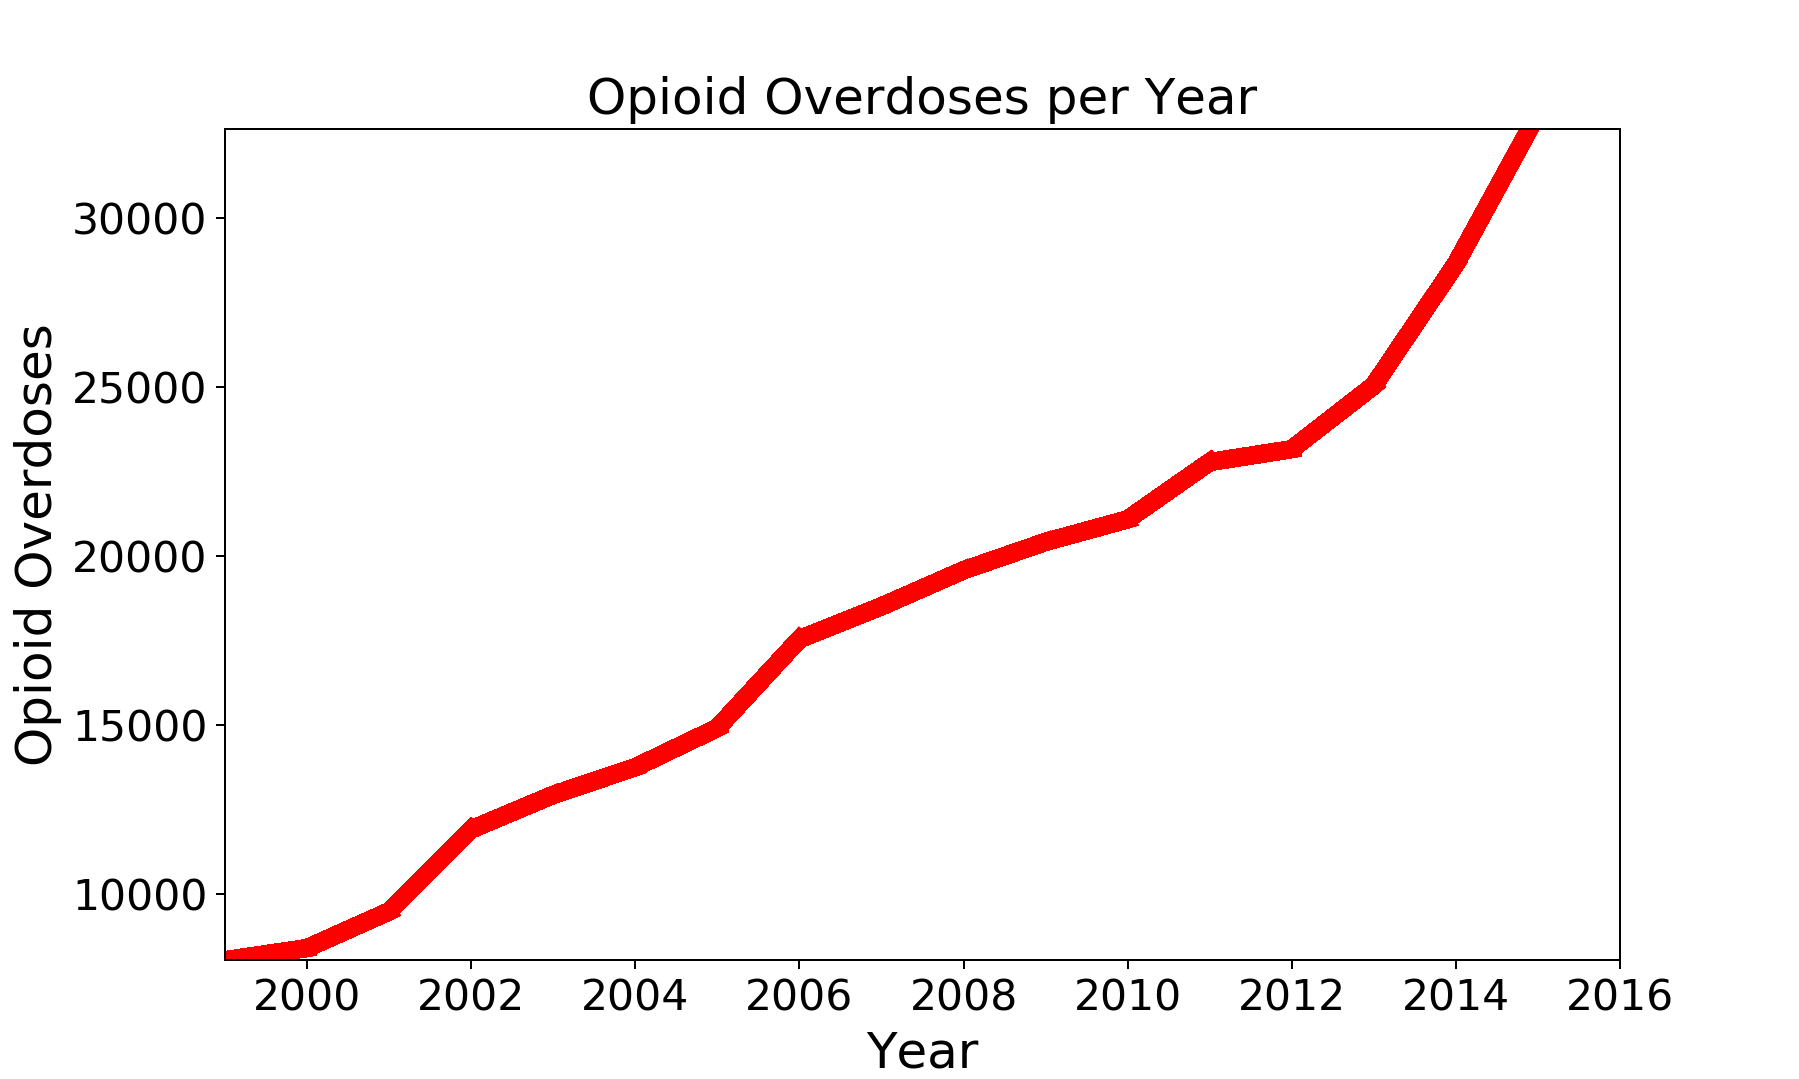

In [130]:
%matplotlib notebook
title = 'Opioid Overdoses'
d = get_data(overdoseAll,21,title)
x = np.array(d.index)
y = np.array(d['Opioid Overdoses'])
XN,YN = augment(x,y,10)
augmented = pd.DataFrame(YN,XN)
augmented.columns = {title}

Writer = animation.writers['ffmpeg']
writer = Writer(fps=50, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(augmented)[0], np.max(augmented)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)

plt.title('Opioid Overdoses per Year',fontsize=20)
def animate(i):
    data = augmented.iloc[:int(i+1)]
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=160, repeat=True)
#ani.save('OpioidOverdoses.mp4', writer=writer)
plt.show()

### Opioid Overdoses Outlook

In [6]:
def forcast(original,numSteps,numYears,goalNumber):
    Countstepsize = (goalNumber - np.max(augmented)[0])/(numYears*numSteps)
    YearStepsize = (numYears)/(numYears*numSteps)
    startYear = max(original.index) + YearStepsize
    newYear = [startYear]
    newNum = [np.max(augmented)[0]+Countstepsize]
    for year in range(numYears):
        for step in range(numSteps):
            newYear = np.append(newYear,newYear[-1]+YearStepsize)
            newNum = np.append(newNum,newNum[-1]+Countstepsize)
    new = pd.DataFrame(newNum,newYear)
    new.columns = {title}
    return new

<IPython.core.display.Javascript object>


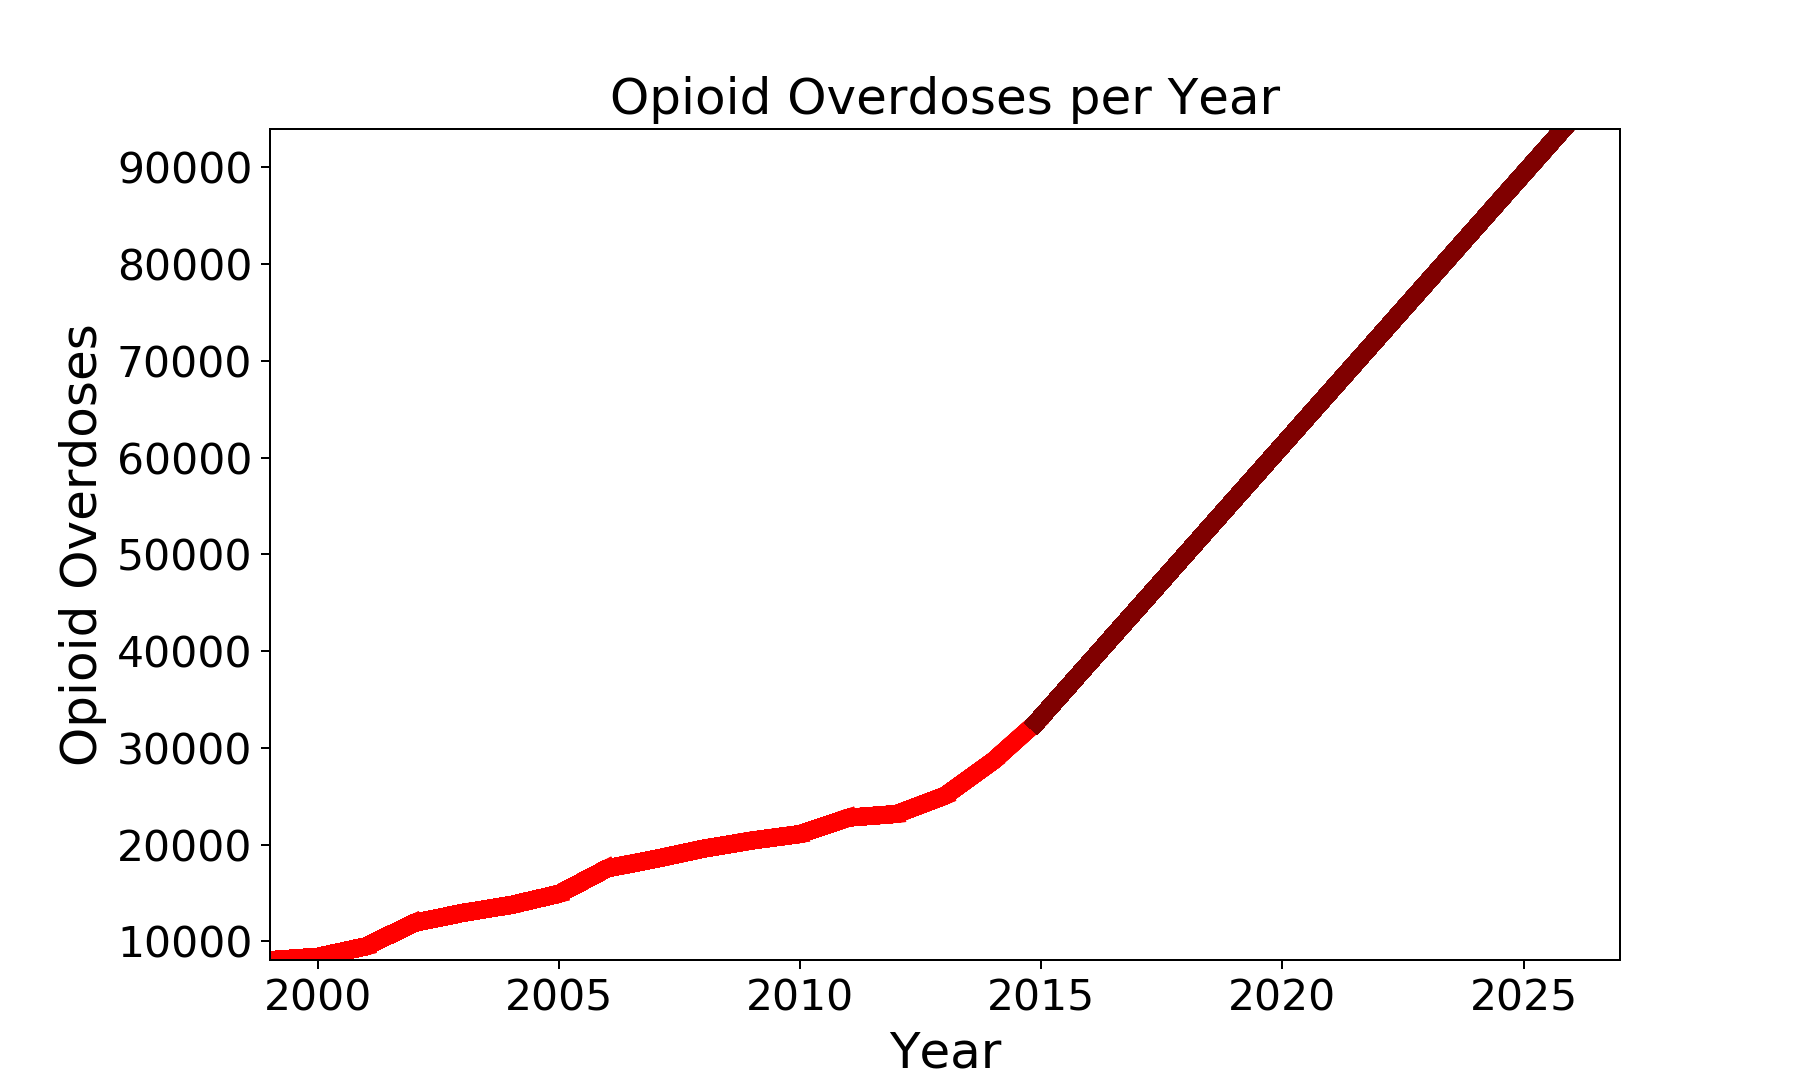

In [7]:
%matplotlib notebook
title = 'Opioid Overdoses'
d = get_data(overdoseAll,21,title)
x = np.array(d.index)
y = np.array(d['Opioid Overdoses'])
XN,YN = augment(x,y,10)
augmented = pd.DataFrame(YN,XN)
augmented.columns = {title}
f = forcast(augmented,10,12,100000)
fc = augmented.append(f)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=50, metadata=dict(artist='Me'), bitrate=1800)

maxRec = np.max(augmented)[0]

fig = plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=0.9, wspace=0.9)
plt.xlim(1999, 2027)
plt.ylim(np.min(augmented)[0], 94000)
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.gcf().subplots_adjust(left=0.15)
plt.title('Opioid Overdoses per Year',fontsize=20)
def animate(i):
    data = fc.iloc[:int(i+1)]    
    if data.iloc[-1][0]>maxRec:
        startFc = data[data[title]==maxRec].index[0]
        data = data[startFc:]
        p2 = sns.lineplot(x=data.index, y=data[title], data=data, color="maroon")
        p2.tick_params(labelsize=17)
        plt.setp(p2.lines,linewidth=7)#, linestyle='dotted')
    else:
        p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
        p.tick_params(labelsize=17)
        plt.setp(p.lines,linewidth=7)
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=320, repeat=True)
ani.save('OpioidOverdosesFc.mp4', writer=writer)
#plt.show()

### Heroin Overdoses

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


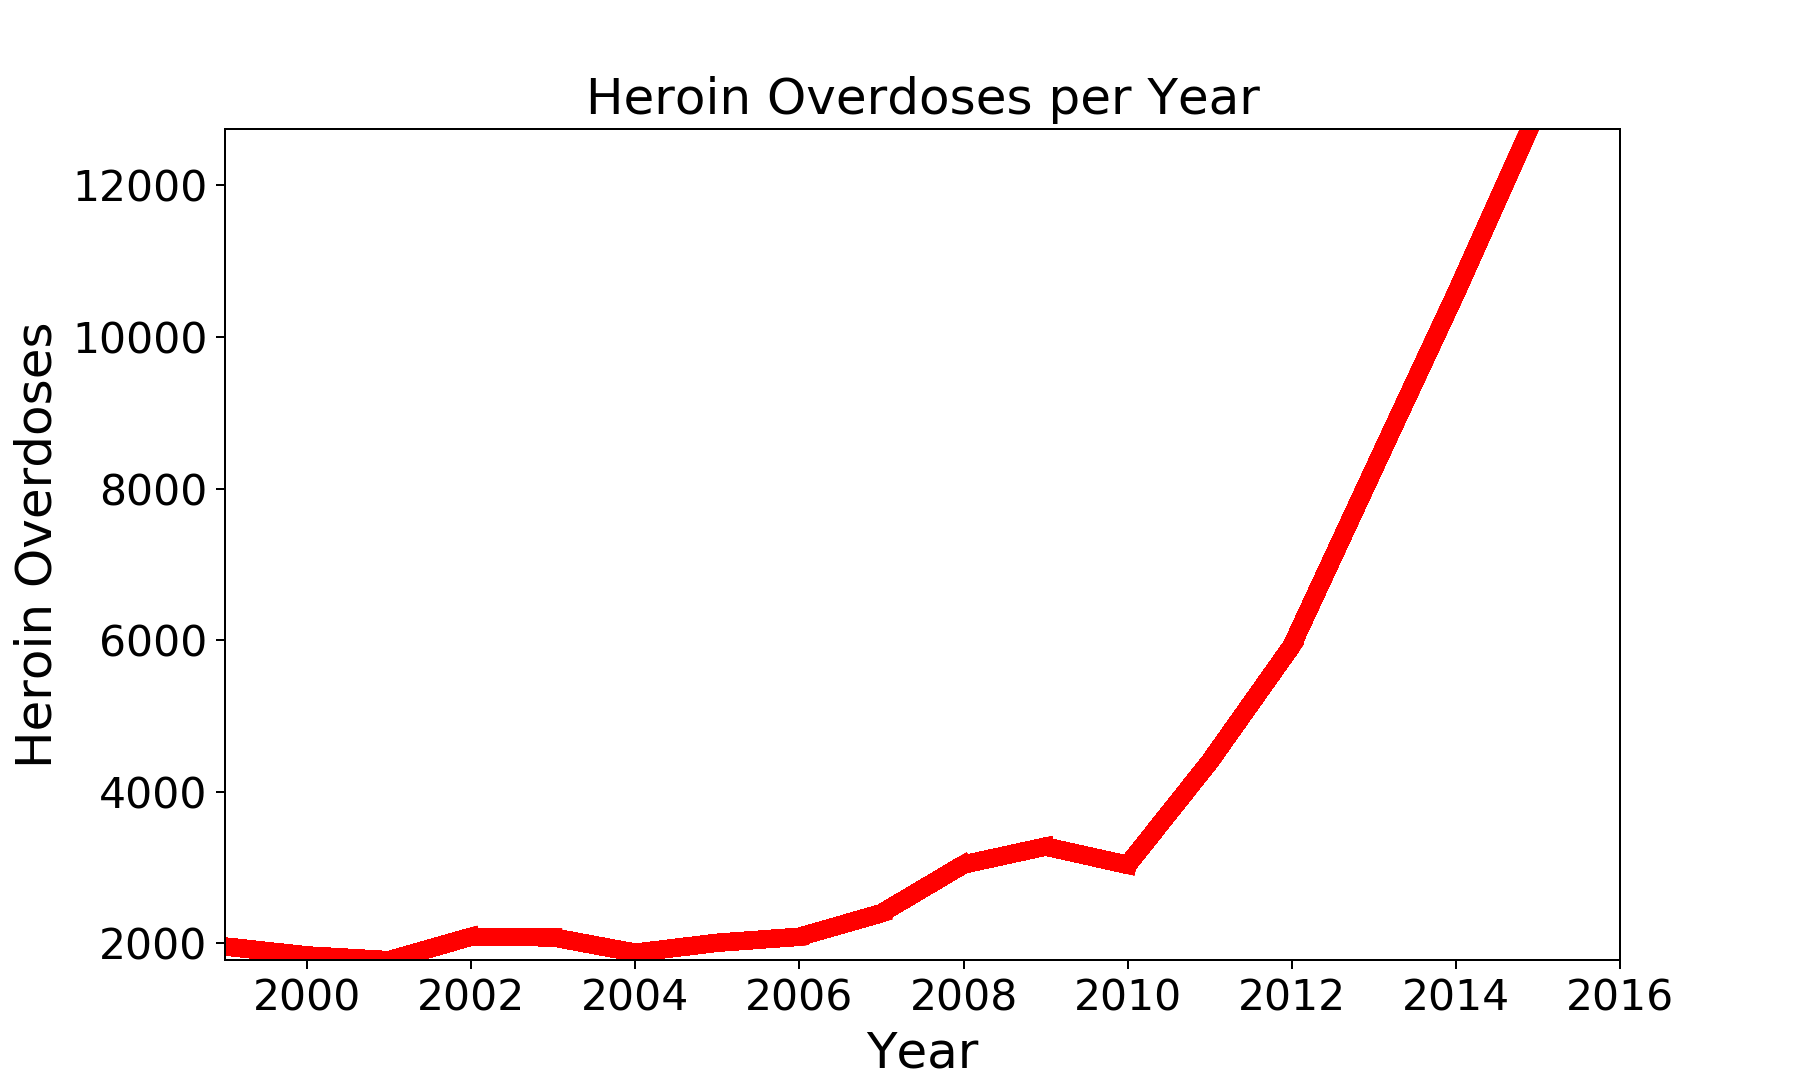

In [122]:
%matplotlib notebook
title = 'Heroin Overdoses'
d = get_data(overdoseAll,18,title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
XN,YN = augment(x,y,10)
augmented = pd.DataFrame(YN,XN)
augmented.columns = {title}

Writer = animation.writers['ffmpeg']
writer = Writer(fps=50, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(augmented)[0], np.max(augmented)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)

plt.title('Heroin Overdoses per Year',fontsize=20)
def animate(i):
    data = augmented.iloc[:int(i+1)]
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=160, repeat=True)
ani.save('HeroinOverdoses.mp4', writer=writer)
#plt.show()

## Opioid Deaths - Crude Rate Map

#### Read in Data

In [8]:
opioid_death = pd.read_csv('opioid_death_1999_2014_v1_1.csv')
#source: https://data.world/health/opioid-overdose-deaths/ 
#who got it from: https://www.cdc.gov/mmwr/preview/mmwrhtml/mm6450a3.htm

In [9]:
opioid_death

,state,year,deaths,population,crude_rate,crude_rate_lower_95_confidence_interval,crude_rate_upper_95_confidence_interval,prescriptions_dispensed_by_us_retailers_in_that_year_millions
0,Alabama,1999,39,4430141,0.9,0.6,1.2,116
1,Alabama,2000,46,4447100,1,0.8,1.4,126
2,Alabama,2001,67,4467634,1.5,1.2,1.9,138
3,Alabama,2002,75,4480089,1.7,1.3,2.1,142
4,Alabama,2003,54,4503491,1.2,0.9,1.6,149
5,Alabama,2004,92,4530729,2,1.6,2.5,155
6,Alabama,2005,83,4569805,1.8,1.4,2.3,163
7,Alabama,2006,134,4628981,2.9,2.4,3.4,174
8,Alabama,2007,172,4672840,3.7,3.1,4.2,184
9,Alabama,2008,195,4718206,4.1,3.6,4.7,196


#### Look at Crude Rate Distribution
Since we have a long tail to the right side of the distribution we use the four percentiles of the distribution for the color scale:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


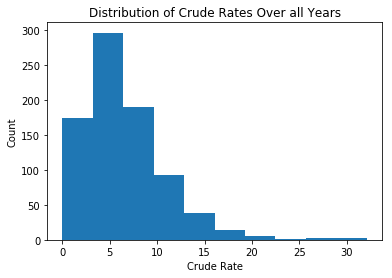

In [11]:
%matplotlib inline
maxRate = np.max(opioid_death['crude_rate'].replace("Unreliable","0.0").replace("Suppressed","0.0").apply(pd.to_numeric))
scale = np.array(np.linspace(0,maxRate,4,dtype='int'))
rates = opioid_death['crude_rate'].replace("Unreliable","0.0").replace("Suppressed","0.0").apply(pd.to_numeric)
plt.hist(rates)
plt.title("Distribution of Crude Rates Over all Years")
plt.xlabel("Crude Rate")
plt.ylabel("Count")
plt.show();

#### Calculate Percentiles for Color Scale

In [12]:
perc1 = np.percentile(rates, 25)
perc2 = np.percentile(rates, 50)
perc3 = np.percentile(rates, 75)

### Plot Crude Rates for Each State in One Year

In [13]:
def getTableOneYear(data,year):
    new = data[data['year']==year][['state','crude_rate']].reset_index()
    new = new.replace("Unreliable","0.0").replace("Suppressed","0.0")[['state',"crude_rate"]]
    new['crude_rate'] = new['crude_rate'].apply(pd.to_numeric)
    return new
t = getTableOneYear(opioid_death,2014)

In [14]:
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
state_geo = 'us-states.json'

m = folium.Map(location=[37, -101], zoom_start=4)

m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=t,
 columns=['state', 'crude_rate'],
 key_on='feature.properties.name',
 fill_color='Reds',
 fill_opacity=0.8,
 line_opacity=0.3,
    threshold_scale=[ 0,perc1,perc2,perc3,maxRate+1],reset=True,
 legend_name='Crude Rate (Opioid Related Deaths per 100.000 )'
)

folium.LayerControl().add_to(m)     

m

## Opioid Perscription Data
-> No graphic needed

In [20]:
opioid_persc = pd.read_csv('OpioidPerscriptions.csv')
#Source: https://www.cdc.gov/drugoverdose/maps/rxrate-maps.html

In [21]:
opioid_persc

,Year,NumberOfPerscriptions,PerscriptionRate
0,2006,"215,917,663",72.4
1,2007,"228,543,773",75.9
2,2008,"237,860,213",78.2
3,2009,"243,738,090",79.5
4,2010,"251,088,904",81.2
5,2011,"252,167,963",80.9
6,2012,"255,207,954",81.3
7,2013,"247,090,443",78.1
8,2014,"240,993,021",75.6
9,2015,"226,819,924",70.6


### Data for Overdose per County (2015-2017)

In [22]:
overdose = pd.read_csv('VSRR_Provisional_Drug_Overdose_Death_Counts.csv')

In [24]:
overdose

,State,State Name,Year,Month,Indicator,Data Value,Predicted Value,Percent Complete,Percent Pending Investigation,Footnote
0,AK,Alaska,2015,January,Number of Deaths,4034.0,NaN,100,0.000000,NaN
1,AK,Alaska,2015,February,Number of Deaths,4084.0,NaN,100,0.000000,NaN
2,AK,Alaska,2015,March,Number of Deaths,4101.0,NaN,100,0.000000,NaN
3,AK,Alaska,2015,April,Number of Deaths,4133.0,NaN,100,0.000000,NaN
4,AK,Alaska,2015,May,Number of Deaths,4196.0,NaN,100,0.000000,NaN
5,AK,Alaska,2015,June,Number of Deaths,4201.0,NaN,100,0.000000,NaN
6,AK,Alaska,2015,July,Number of Deaths,4220.0,NaN,100,0.000000,NaN
7,AK,Alaska,2015,August,Number of Deaths,4222.0,NaN,100,0.000000,NaN
8,AK,Alaska,2015,September,Number of Deaths,4242.0,NaN,100,0.000000,NaN
9,AK,Alaska,2015,October,Number of Deaths,4241.0,NaN,100,0.000000,NaN
